In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import feature_eng, plot_behavior, extract_seq
import matplotlib.patches as mpatches


In [4]:
df = pd.read_csv('/mnt/c/Users/tkdgk/CMI_detect_behavior-1/data/train.csv')

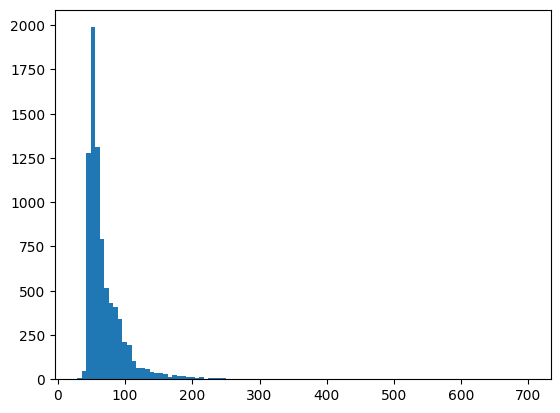

52     372
50     367
51     351
53     334
49     328
      ... 
177      1
233      1
630      1
224      1
426      1
Name: count, Length: 232, dtype: int64

In [5]:
n_long = []
for _, seq in df.groupby("sequence_id"):
    n_long.append(len(seq))

plt.hist(n_long, bins=100)
plt.show()

df.groupby("sequence_id").size().value_counts()

In [7]:
print(np.percentile(n_long, 0.95))

43.0


In [8]:
BFRB = [
        "Above ear - pull hair", "Forehead - pull hairline", "Forehead - scratch",
        "Eyebrow - pull hair", "Eyelash - pull hair", "Neck - pinch skin",
        "Neck - scratch", "Cheek - pinch skin"
    ]

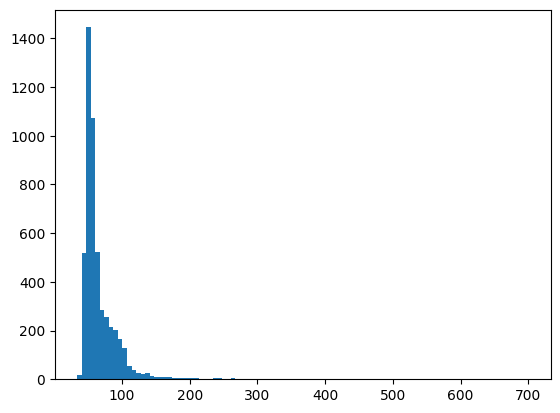

In [9]:
n_long = []
for _, seq in df.groupby("sequence_id"):
    if seq["gesture"].iloc[0] in BFRB:
        n_long.append(len(seq))

plt.hist(n_long, bins=100)
plt.show()

In [2]:
sub = np.load('/mnt/c/Users/tkdgk/CMI_detect_behavior-1/src/outputs/2025-07-12/13-22-31/output/fold1submission.npy')
sol = np.load('/mnt/c/Users/tkdgk/CMI_detect_behavior-1/src/outputs/2025-07-12/13-22-31/output/fold1solution.npy')

(array([128., 128., 128.,   0., 128., 128.,   0., 127., 128., 128.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

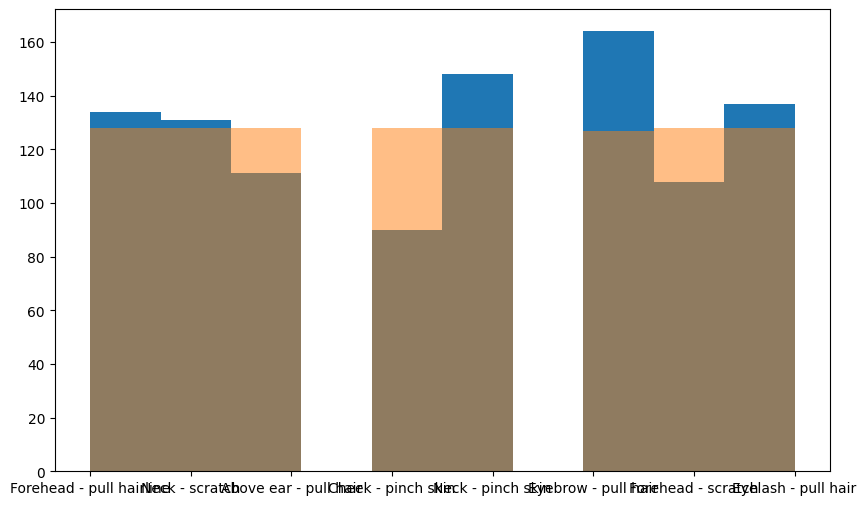

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(sub, color="C0")
plt.hist(sol, color="C1", alpha=0.5)

In [ ]:
train = pd.read_csv('../data/train.csv')

: 

In [8]:
train.columns

Index(['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase', 'gesture', 'acc_x',
       ...
       'tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58',
       'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63'],
      dtype='object', length=341)

In [9]:
demo = pd.read_csv('../data/train_demographics.csv')

In [10]:
BFRB = [
        "Above ear - pull hair", "Forehead - pull hairline", "Forehead - scratch",
        "Eyebrow - pull hair", "Eyelash - pull hair", "Neck - pinch skin",
        "Neck - scratch", "Cheek - pinch skin"
    ]

non_BFRB = [
        "Drink from bottle/cup", "Glasses on/off", "Pull air toward your face",
        "Pinch knee/leg skin", "Scratch knee/leg skin", "Write name on leg",
        "Text on phone", "Feel around in tray and pull out an object",
        "Write name in air", "Wave hello"
    ]

In [ ]:
Eyebrow = extract_seq(train, "Eyebrow - pull hair")
Eyelash = extract_seq(train, "Eyelash - pull hair")
Forehead = extract_seq(train, "Forehead - scratch")

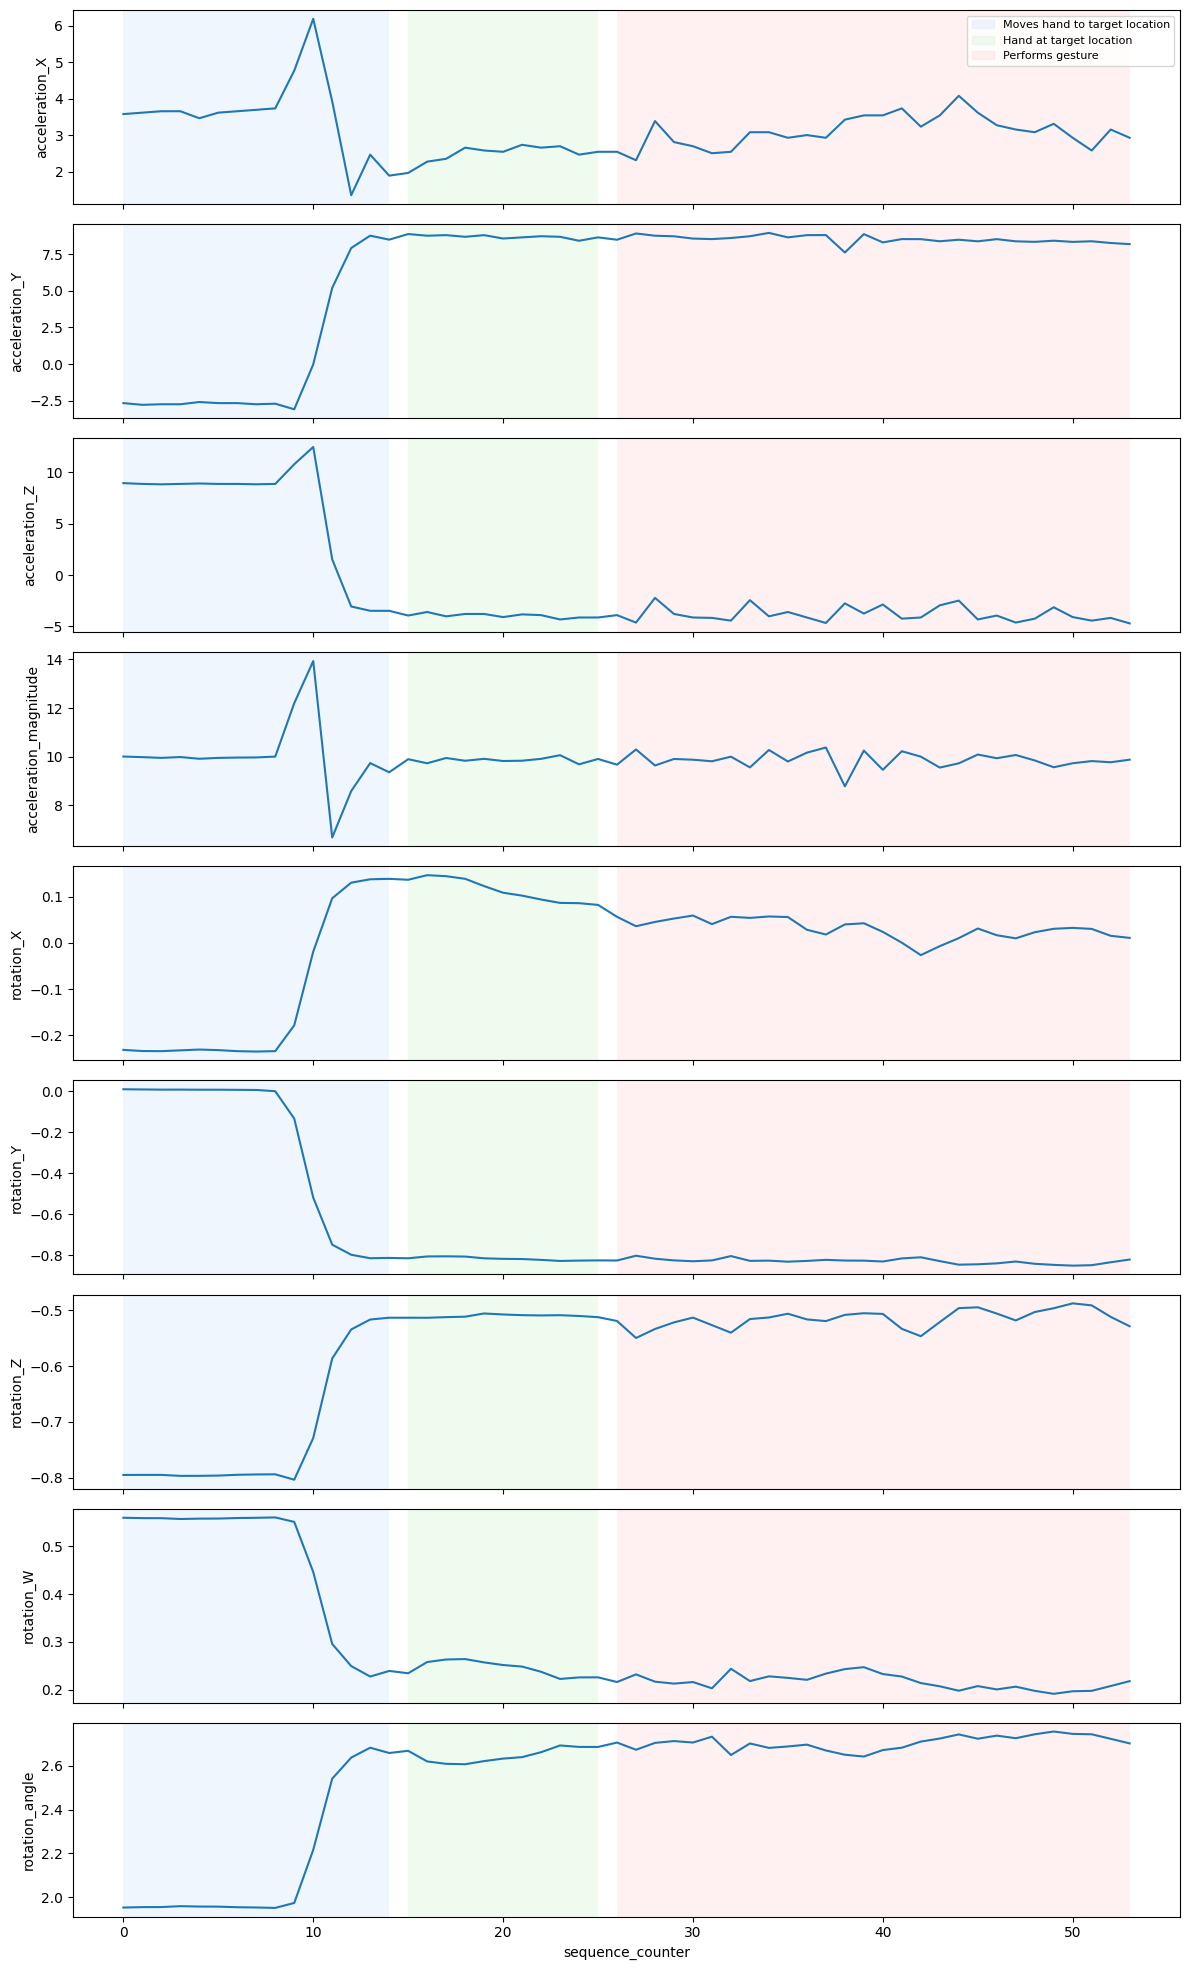

In [12]:
plot_behavior(Eyebrow[0])

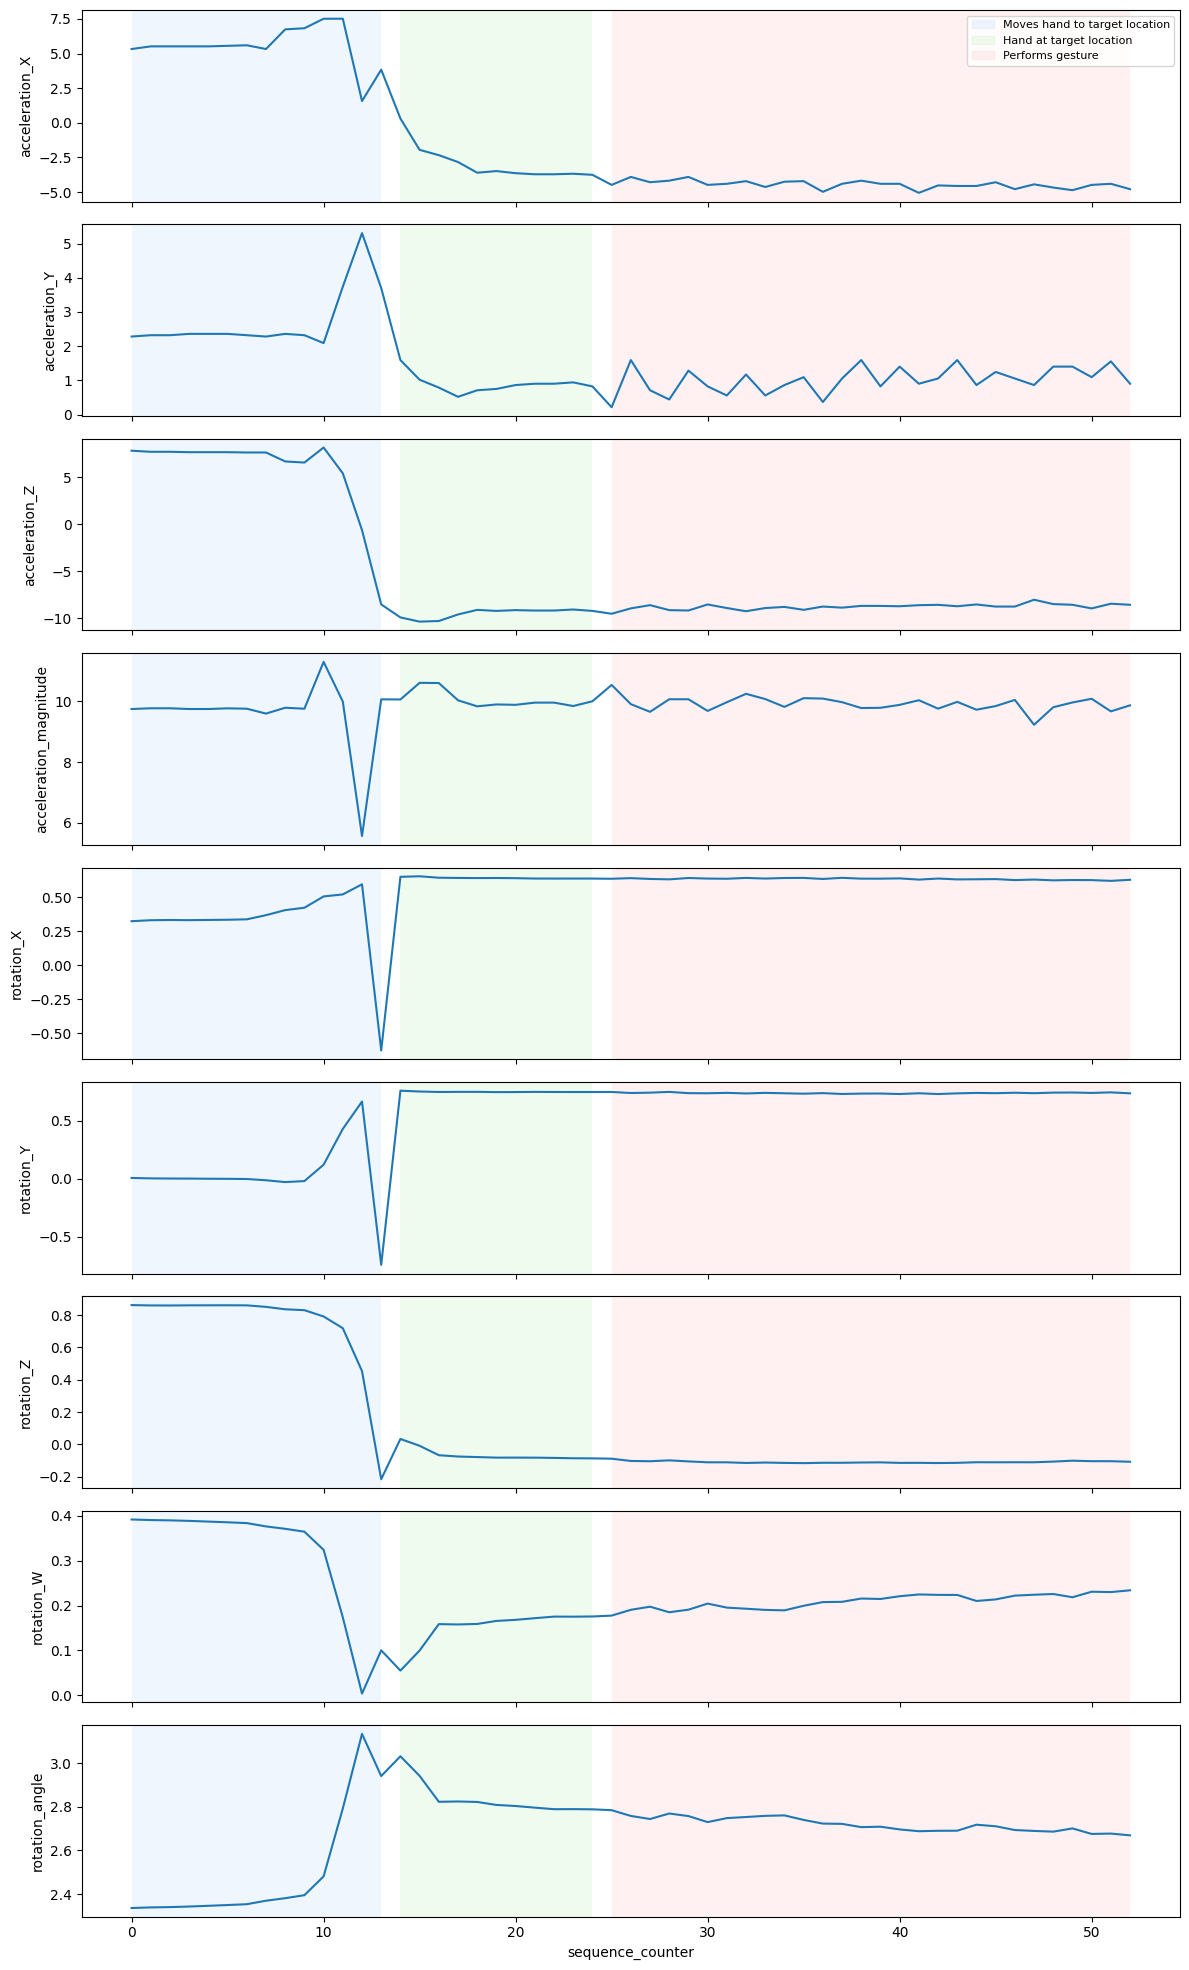

In [15]:
plot_behavior(Eyelash[2])

In [ ]:
plot_behavior(Forehead[0])

BFRBの中で非常に似ているもの
["Eyebrow - pull hair", "Eyelash - pull hair", "Forehead - pull hairline"]


In [10]:
Neck = extract_seq(train, "Neck - scratch")

In [5]:
cheek = extract_seq(train, "Cheek - pinch skin")

In [30]:
demo.loc[demo["subject"]==Neck[4]["subject"].iloc[0]]

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
9,SUBJ_013623,1,36,0,0,182.0,56,28.0


首、頬、目、まつ毛、おでこまでの距離が知りたい

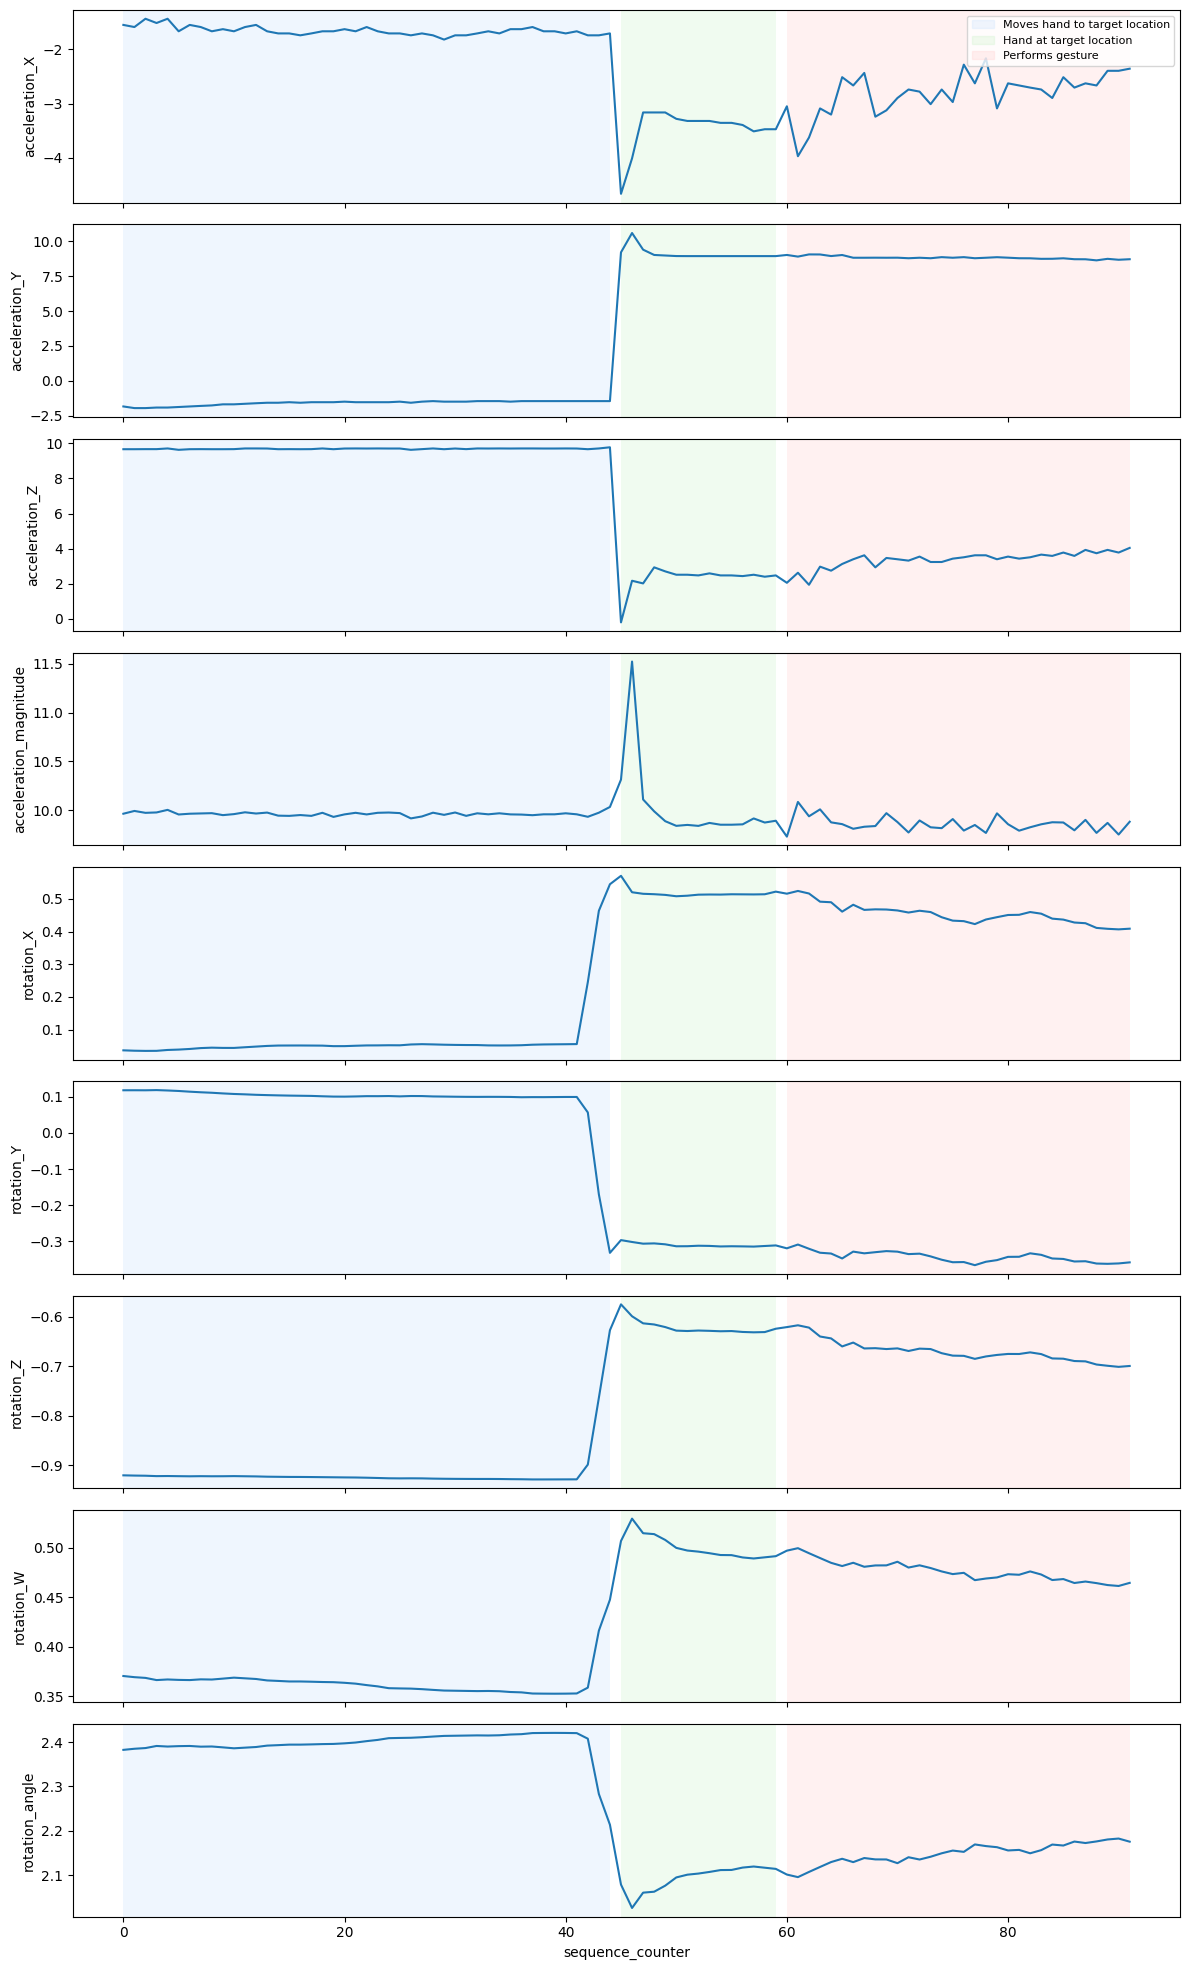

In [28]:
plot_behavior(Neck[12])

In [7]:
solution = np.load('/mnt/c/Users/tkdgk/CMI_detect_behavior-1/src/outputs/2025-07-08/17-39-59/output/fold2solution.npy')
submission = np.load('/mnt/c/Users/tkdgk/CMI_detect_behavior-1/src/outputs/2025-07-08/17-39-59/output/fold2submission.npy')

In [8]:
pair = []
for i, sub in enumerate(submission):
    if sub !=solution[i]:
        print(sub, solution[i])
        pair.append([sub, solution[i]])


eyebrow cheek
cheek neck
eyebrow forehead
forehead neck
cheek neck
cheek eyebrow
cheek neck
cheek neck
forehead eyebrow
cheek neck
cheek neck
cheek eyebrow
forehead eyebrow
eyebrow forehead
cheek neck
cheek ear
cheek neck
eyebrow forehead
forehead cheek
cheek neck
eyebrow forehead
eyebrow forehead
eyebrow forehead
forehead eyebrow
eyebrow neck
cheek forehead
cheek neck
forehead ear
cheek neck
forehead eyelash
cheek eyelash
eyebrow neck
cheek ear
cheek neck
cheek forehead
cheek eyebrow
eyebrow forehead
eyebrow forehead
eyebrow ear
cheek ear
cheek eyebrow
cheek neck
forehead ear
cheek eyelash
cheek neck
forehead eyelash
cheek eyebrow
cheek eyebrow
cheek forehead
cheek forehead
eyebrow ear
cheek neck
cheek eyebrow
cheek neck
forehead eyebrow
eyebrow forehead
forehead neck
forehead neck
cheek eyebrow
cheek eyelash
cheek ear
forehead neck
cheek eyebrow
forehead neck
cheek neck
cheek eyelash
cheek forehead
cheek ear
forehead ear
cheek neck
cheek forehead
cheek eyelash
forehead neck
cheek for

(array([159.,   0.,   0., 494.,   0.,   0., 192.,   0.,   0.,   5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

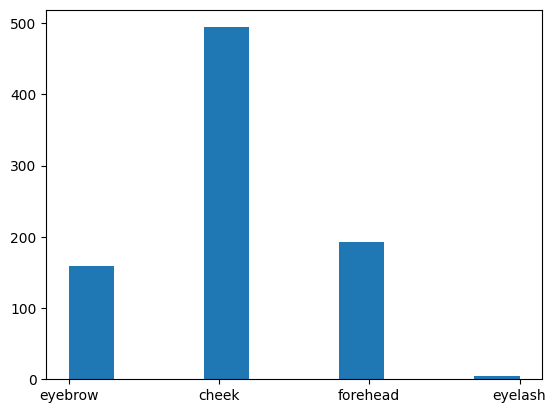

In [9]:
plt.hist(np.array(pair)[:,0])

(array([127.,   0., 128.,   0., 256.,   0., 128.,   0., 256., 128.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

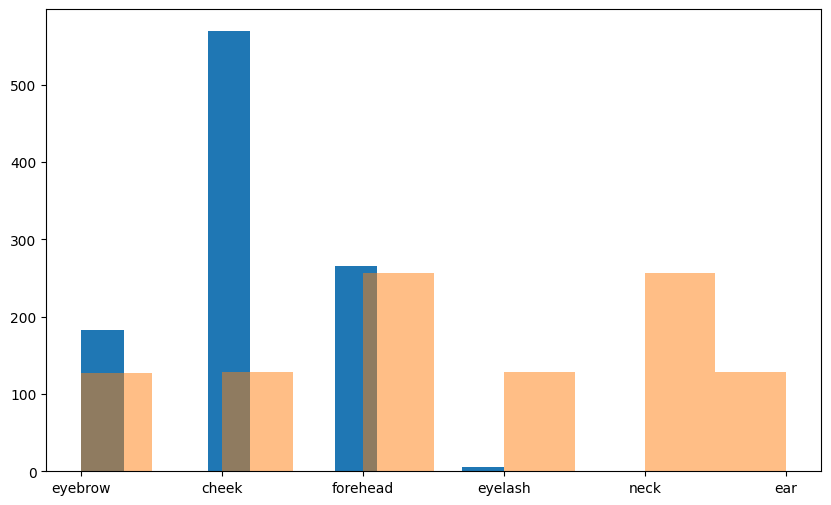

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(submission, color="C0")
plt.hist(solution, color="C1", alpha=0.5)

(array([128.,   0., 128.,   0., 128.,   0., 383.,   0., 128., 128.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

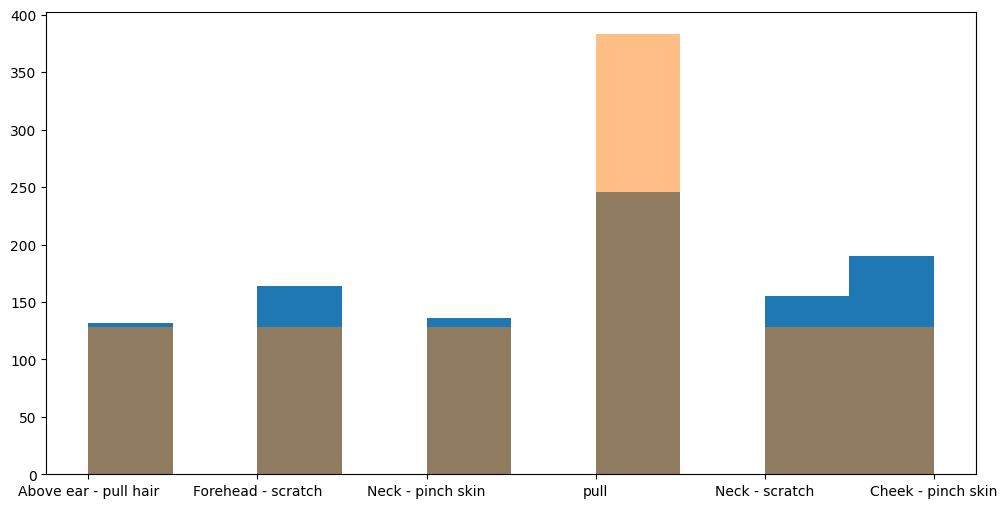

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(submission, color="C0")
plt.hist(solution, color="C1", alpha=0.5)